# BCM Rule - recurrent network

## Single postsynaptic neuron

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
%matplotlib inline

Updating functions for a single neuron $y$, its weights $w$ and the threshold $\theta$:
$$ \mathbf{y}(t) = \mathbf{w}\mathbf{y} $$
$$ \frac{d\mathbf{w}}{dt} = \eta \mathbf{x} \mathbf{y}(\mathbf{y}(t)-\mathbf{\theta}) $$
$$ \frac{d\mathbf{\theta}}{dt} = \frac{\mathbf{y}^2}{y_0} $$

In [163]:
class NeuralNet(object):
    
    def __init__(self, FF_NUM=3, REC_NUM=10,  TOT_TIME=20, STEPS_DIM=0.0001, INPUT_RATE = 20,
                   TARGET_RATE=10, THETA_START=0.07, ETA=float('1e-4'), TAU=0.03, TIME_CONST = 0.01,
                   FF_PL=False, REC_PL=True):
        self.FF_NUM = FF_NUM
        self.REC_NUM = REC_NUM
        self.TOT_TIME = TOT_TIME
        self.STEPS_DIM = STEPS_DIM
        self.INPUT_RATE = INPUT_RATE
        self.TARGET_RATE = TARGET_RATE
        self.THETA_START = THETA_START
        self.ETA = ETA
        self.TAU = TAU #for weights
        self.FF_PL = FF_PL
        self.REC_PL = REC_PL
        self.TIME_CONST = TIME_CONST #for rate
        
        self.change_values()
        
        
    def __repr__(self):
        return '''%d FF neurons\n%d REC neurons''' % (self.FF_NUM, self.REC_NUM) 
        
        
    def change_values(self):
        self.STEPS_N = round(self.TOT_TIME/self.STEPS_DIM)
        self.time_vect = np.linspace(0,self.TOT_TIME, self.STEPS_N)
        
        self.rec_nn = np.zeros((self.REC_NUM, self.STEPS_N))
        self.rec_nn[:,0] = np.random.randint(0,self.INPUT_RATE,self.REC_NUM)
        
        self.w_ff = np.random.random([self.REC_NUM, self.FF_NUM])*0.5
        
        self.w_rec = np.random.random([self.REC_NUM, self.REC_NUM])*0.21
        self.w_rec[np.diag_indices(self.REC_NUM)] = 0
        
        periodic_sig = np.zeros((self.FF_NUM, (round(10/self.STEPS_DIM))))
        periodic_sig[:,0:round(periodic_sig.shape[1]/2)] = 0
        
        self.ff_nn = np.tile(periodic_sig, [1, 50])
        
        self.theta = np.zeros((self.REC_NUM, self.STEPS_N))
        self.theta[:,0] = self.THETA_START
    
    
    def run_network(self):
        for i in range(1,self.STEPS_N):
            self.rec_nn[:,i] = self.rec_nn[:,i-1] + (self.STEPS_DIM)*(
                    -self.rec_nn[:,i-1] + self.w_rec[:,:].dot(self.rec_nn[:,i-1]) + 
                    self.w_ff[:,:].dot(self.ff_nn[:,i-1]))
            
            self.theta[:,i] = self.theta[:,i-1] + (self.STEPS_DIM/self.TAU) * (
                -self.theta[:,i-1] + (self.rec_nn[:,i]**2)/self.TARGET_RATE)
                        
            if self.REC_PL:
                self.w_rec[:,:] = self.w_rec[:,:] + self.STEPS_DIM*self.ETA *(
                    self.w_rec[:,:] * (self.rec_nn[:,i-1]*(self.rec_nn[:,i-1] - self.theta[:,i-1])).T).T
                
                self.w_rec[self.w_rec < 0] = 0
            
            elif self.FF_PL:
                self.w_ff[:,:] = self.w_ff[:,:] + self.STEPS_DIM*self.ETA *(
                    self.w_ff[:,:] * (self.ff_nn[:,i-1]*(self.ff_nn[:,i-1] - self.theta[:,i-1])).T).T
                
                self.w_ff[self.w_ff < 0] = 0

                
    def plot_nn(self):
        f, ax = plt.subplots(1,1, figsize = (20,5))
        
        ax.plot(self.time_vect, [plastic_recurr.TARGET_RATE]*plastic_recurr.time_vect.shape[0], 'k--')
                   
        for i in range(self.REC_NUM):
            ax.plot(self.time_vect, self.rec_nn[i,0:self.time_vect.shape[0]])
        
        for i in range(self.FF_NUM):
            ax.plot(self.time_vect, self.ff_nn[i,0:self.time_vect.shape[0]], 'k')
            

In [164]:
plastic_recurr = NeuralNet()

In [165]:
plastic_recurr.run_network()


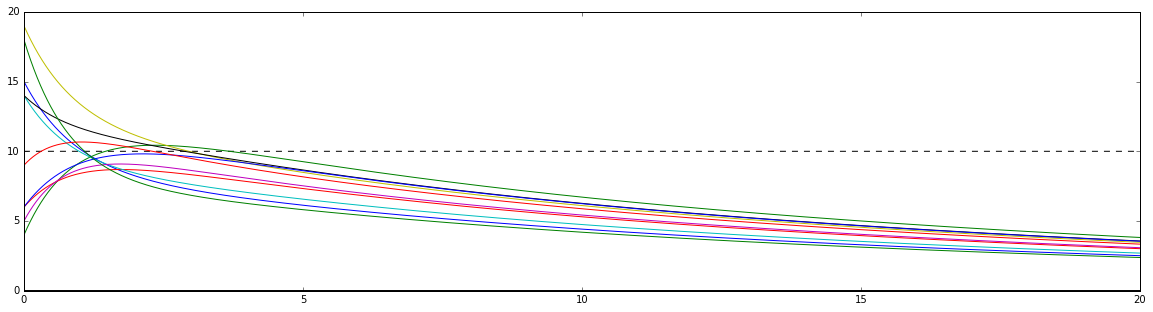

In [166]:
plastic_recurr.plot_nn()
